In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv(r'\dataset\train.csv')

In [3]:
test=pd.read_csv(r'\dataset\test.csv')

In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.shape, test.shape

((384, 13), (96, 12))

In [8]:
train['Loan_Status'].value_counts()

Y    271
N    113
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.705729
N    0.294271
Name: Loan_Status, dtype: float64

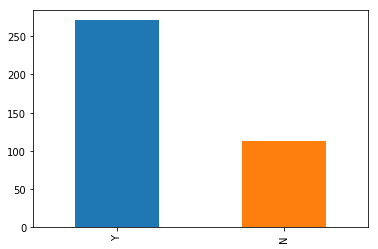

In [10]:
train['Loan_Status'].value_counts().plot.bar()

In [11]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

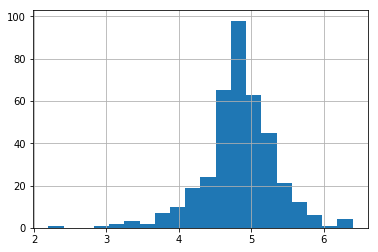

In [12]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [13]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)


In [14]:
x = train.drop('Loan_Status',1)
y = train.Loan_Status

In [15]:
X=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='12', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
pred_cv=model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8103448275862069

In [19]:
pred_test = model.predict(test)

In [20]:
submission=pd.read_csv("output:\sample sub.csv")

FileNotFoundError: File b'D:\\sample sub.csv' does not exist

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)


In [ ]:
pd.DataFrame(submission,columns = ['Loan_ID','Loan_Status']).to_csv('output:\Logistic.csv')

In [ ]:
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y.loc[train_index],y.loc[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score= accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,pred,pos_label=2)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()



In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('output:\Logistic.csv')

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

In [ ]:
sns.distplot(train['Total_Income']);


In [ ]:
train['Total_Income_Log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_Log']);
test['Total_Income_Log']=np.log(test['Total_Income'])


In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

In [ ]:
sns.distplot(train['EMI']);


In [ ]:
train['BalanceIncome']=train['Total_Income']-(train['EMI']*1000)
test['BalanceIncome']=test['Total_Income']-(test['EMI']*1000)

In [ ]:
sns.distplot(train['BalanceIncome']);

In [ ]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] , axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'] , axis=1)

In [ ]:
train=pd.read_csv(r'C:\dataset\train.csv',index_col=0)
x = train.drop('Loan_Status',1)
y = train.Loan_Status

In [ ]:
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score= accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,pred,pos_label=2)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('output:\Logistic2.csv')

In [ ]:
#DECISION TREE
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score= accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred=model.predict_proba(xvl)[:,1]


In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,pred,pos_label=2)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('output:\Tree1.csv')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=RandomForestClassifier(random_state=1,max_depth=3,n_estimators=41)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score= accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test=model.predict(test)
    pred2=model.predict_proba(test)[:,1]

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,pred,pos_label=2)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('output:\Random.csv')